In [1]:
import os
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential         # class
from tensorflow.keras.models import load_model         # model 사용
from tensorflow.keras.layers import Dense              # 전결합
from tensorflow.keras.callbacks import EarlyStopping   # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 학습 자동 중지
from tensorflow.keras import regularizers       # 가중치에 L1, L2 규제 적용

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
data = np.loadtxt('./wine_2.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(6497, 13)


In [4]:
X = data[:, 0:12]
print(X.shape)
Y = data[:, 12]
print(Y.shape)

(6497, 12)
(6497,)


In [5]:
# train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
seed = 0
# 90%: 분할대기, 10%: 테스트
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                            stratify=Y,
                                                            test_size=0.1,
                                                            random_state=seed)
# 나머지 데이터 85%를 분할, 90%: 훈련, 10%: 테스트
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)

print(y_val)
print(y_val.shape)

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
model = Sequential()

# 네트워크 구성
# model.add(Dense(128, input_dim=12, activation='relu'))
model.add(Dense(64, input_shape=(12, ), activation='relu'))
# model.add(Dense(64, activation='relu')) # 입력: 128, 출력: 64 
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 0 ~ 1 사이의 값으로 변경
# 1: 출력 노드 수, input_dim=10: 입력 데이터 갯수

# 학습 설정, 수치예측은 metrics 생략시 loss에 지정된 mse를 사용
model.compile(optimizer='adam', loss='binary_crossentropy', 
                                metrics=['accuracy'])

# 최소 오차 5번 나오면 자동 종료
early_stopping = EarlyStopping(monitor='loss', patience=5)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): # 폴더가 존재하지 않으면 생성
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:04d}-{val_accuracy:.4f}.h5'    
# 검증 정확도가 개선되었을 때만 학습 모델 파일로 저장
checkpointer = ModelCheckpoint(filepath=modelpath,
                              monitor='val_accuracy',
                              verbose=1, save_best_only=True)

# 학습
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                 epochs=1000, 
                 batch_size=10, 
                 callbacks=[early_stopping, checkpointer])

Train on 5262 samples, validate on 585 samples
Epoch 1/1000
4850/5262 [==========================>...] - ETA: 0s - loss: 0.2568 - accuracy: 0.9146
Epoch 00001: val_accuracy improved from -inf to 0.94530, saving model to ./model/0001-0.9453.h5
5262/5262 [==============================] - 1s 273us/sample - loss: 0.2516 - accuracy: 0.9156 - val_loss: 0.1689 - val_accuracy: 0.9453
Epoch 2/1000
4890/5262 [==========================>...] - ETA: 0s - loss: 0.1711 - accuracy: 0.9421
Epoch 00002: val_accuracy improved from 0.94530 to 0.95214, saving model to ./model/0002-0.9521.h5
5262/5262 [==============================] - 1s 137us/sample - loss: 0.1729 - accuracy: 0.9407 - val_loss: 0.1402 - val_accuracy: 0.9521
Epoch 3/1000
5180/5262 [============================>.] - ETA: 0s - loss: 0.1551 - accuracy: 0.9438
Epoch 00003: val_accuracy did not improve from 0.95214
5262/5262 [==============================] - 1s 138us/sample - loss: 0.1542 - accuracy: 0.9443 - val_loss: 0.1316 - val_accuracy:

Epoch 28/1000
4880/5262 [==========================>...] - ETA: 0s - loss: 0.0614 - accuracy: 0.9816
Epoch 00028: val_accuracy did not improve from 0.98291
5262/5262 [==============================] - 1s 134us/sample - loss: 0.0597 - accuracy: 0.9821 - val_loss: 0.0545 - val_accuracy: 0.9795
Epoch 29/1000
5170/5262 [============================>.] - ETA: 0s - loss: 0.0554 - accuracy: 0.9812
Epoch 00029: val_accuracy did not improve from 0.98291
5262/5262 [==============================] - 1s 139us/sample - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.0666 - val_accuracy: 0.9795
Epoch 30/1000
5100/5262 [============================>.] - ETA: 0s - loss: 0.0554 - accuracy: 0.9820
Epoch 00030: val_accuracy did not improve from 0.98291
5262/5262 [==============================] - 1s 141us/sample - loss: 0.0544 - accuracy: 0.9821 - val_loss: 0.0848 - val_accuracy: 0.9692
Epoch 31/1000
4870/5262 [==========================>...] - ETA: 0s - loss: 0.0546 - accuracy: 0.9834
Epoch 00031: val_acc

Epoch 56/1000
5180/5262 [============================>.] - ETA: 0s - loss: 0.0450 - accuracy: 0.9867
Epoch 00056: val_accuracy did not improve from 0.98632
5262/5262 [==============================] - 1s 137us/sample - loss: 0.0449 - accuracy: 0.9867 - val_loss: 0.0471 - val_accuracy: 0.9829


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,103
Trainable params: 3,103
Non-trainable params: 0
_________________________________________________________________


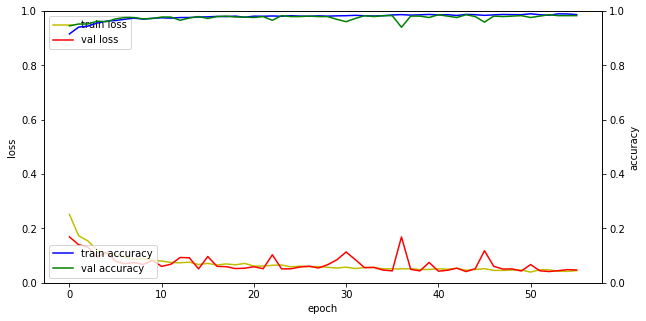

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.03817714544692689 /정확도: 99.23076629638672 %


In [12]:
model.save('./model/0041-0.9863.h5')

In [13]:
pd = model.predict(x_test[0:10])

for i in range(len(x_test[0:10])):
    fmt = '실제값: {0}, 예측값: {1}'
    print(fmt.format(y_test[i], pd[i]), end='')
    
    if (pd[i] >= 0.5):
        print('--> Red 와인')   # 1
    else:
        print('--> White 와인') # 0

실제값: 0.0, 예측값: [0.00085649]--> White 와인
실제값: 0.0, 예측값: [0.0016301]--> White 와인
실제값: 0.0, 예측값: [0.0061059]--> White 와인
실제값: 0.0, 예측값: [0.00078571]--> White 와인
실제값: 1.0, 예측값: [0.02376187]--> White 와인
실제값: 0.0, 예측값: [0.00434965]--> White 와인
실제값: 0.0, 예측값: [0.00191197]--> White 와인
실제값: 0.0, 예측값: [0.00016415]--> White 와인
실제값: 0.0, 예측값: [0.06040068]--> White 와인
실제값: 0.0, 예측값: [0.00021505]--> White 와인
